## House-Price-Prediction using Advanced Regression

### Understanding Data

#### Importing Library

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 300)

Reading the Data from the Dataset provided

In [2]:
df=pd.read_csv('train.csv')

In [3]:
# Check the no. of rows and columns
df.shape

(1460, 81)

In [4]:
# See the Top 5 rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

#### Check the null values

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Check columns missing percentage 
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(25)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64

We can see that from Column `PoolQC` to `Electrical` there are missing values

In [8]:
#Dropping column which has the highest number of missing values, as it wont be in no use, 
#as well dropping `Id` column

df.drop(['Id', 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

# Dropping the 3 columns as they have only one value `0` which do not 
df=df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [9]:
## We can see that Garage is common for `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageCond`, `GarageQual`
## so we can replace the NA wilth custom value of NoGarage
df['GarageType'] = df['GarageType'].replace(np.NaN, 'NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.NaN, 0.0)
df['GarageFinish'] = df['GarageFinish'].replace(np.NaN, 'NoGarage')
df['GarageCond'] = df['GarageCond'].replace(np.NaN, 'NoGarage')
df['GarageQual'] = df['GarageQual'].replace(np.NaN, 'NoGarage')

In [10]:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

LotFrontage      17.74
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
FullBath          0.00
TotRmsAbvGrd      0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
KitchenQual       0.00
MSSubClass        0.00
Functional        0.00
Fireplaces        0.00
GarageType        0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
ScreenPorch       0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
GarageQual        0.00
GarageArea        0.00
GarageCars        0.00
GarageFinish      0.00
GarageYrBlt       0.00
1stFlrSF          0.00
TotalBsmtSF       0.00
CentralAir        0.00
OverallCond       0.00
LotArea    

In [11]:
# from the above list we figureout that Basement has few NA values we can replace the same with custom value
## similarly for basement columns replace with NoBasement
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.NaN, 'NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.NaN, 'NoBasement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.NaN, 'NoBasement')
df['BsmtCond'] = df['BsmtCond'].replace(np.NaN, 'NoBasement')
df['BsmtQual'] = df['BsmtQual'].replace(np.NaN, 'NoBasement')

In [12]:
## checking null values again
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

LotFrontage      17.74
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
MSSubClass        0.00
HalfBath          0.00
TotRmsAbvGrd      0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
BsmtHalfBath      0.00
FullBath          0.00
Fireplaces        0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
Functional        0.00
GarageType        0.00
HeatingQC         0.00
OpenPorchSF       0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
ScreenPorch       0.00
EnclosedPorch     0.00
WoodDeckSF        0.00
GarageYrBlt       0.00
PavedDrive        0.00
GarageCond        0.00
GarageQual        0.00
GarageArea        0.00
GarageCars        0.00
GarageFinish      0.00
CentralAir        0.00
TotalBsmtSF       0.00
Heating           0.00
Neighborhood      0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType   

In [13]:
#Lotfrontage has approx 17% data missing, hence adding using median instead of mean
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.NaN, 0.0)
df['MasVnrType'] = df['MasVnrType'].replace(np.NaN, 'None')

In [15]:
# Checking for null values
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

Electrical       0.07
MSSubClass       0.00
BsmtHalfBath     0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtFullBath     0.00
MSZoning         0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
CentralAir       0.00
HeatingQC        0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
OpenPorchSF      0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
ScreenPorch      0.00
EnclosedPorch    0.00
WoodDeckSF       0.00
GarageYrBlt      0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
GarageCars       0.00
GarageFinish     0.00
Heating          0.00
TotalBsmtSF      0.00
BsmtUnfSF        0.00
LandSlope        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LotConfig 

We can see from the above list that almost all null values are handled

In [16]:
# checking for duplicates data
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice


We can see that no duplicate data is there

### Performing EDA

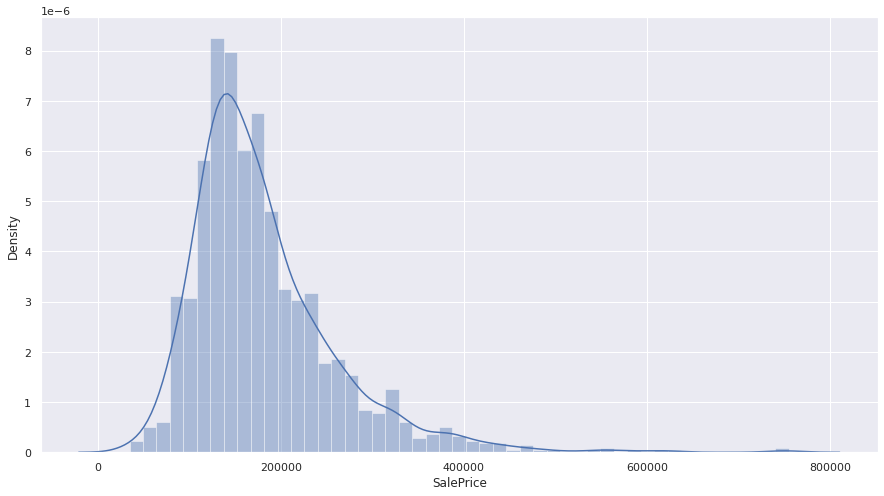

In [17]:
# Analyisng the target variable
plt.figure(figsize=[15,8])
sns.distplot(df.SalePrice);

The target variable `SalePrice` is skewed from the right

In [18]:
print("Skewness:", df.SalePrice.skew())

Skewness: 1.8828757597682129


Skewness is greater than 1, we have to perform log transformation

In [19]:
df.SalePrice = np.log(df.SalePrice)
print("Skewness:", df.SalePrice.skew())

Skewness: 0.12133506220520393


Skewness is less than 1

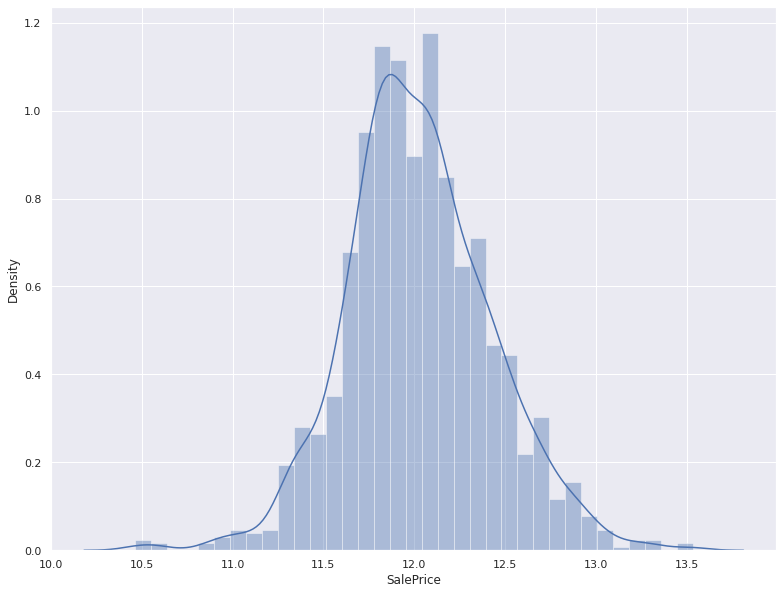

In [20]:
plt.figure(figsize=[13,10])
sns.distplot(df.SalePrice);

In [21]:
# Now we need to indentify the NUmerical values
df.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
#Using IQR to remove outliers
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']
Q1=df[cols].quantile(0.05)
Q3=df[cols].quantile(0.95)
IQR=Q3-Q1
df=df[~((df[cols] < ( Q1 - 1.5 * IQR )) | (df[cols] > ( Q3 + 1.5 * IQR))).any(axis=1)]

<Figure size 432x288 with 0 Axes>

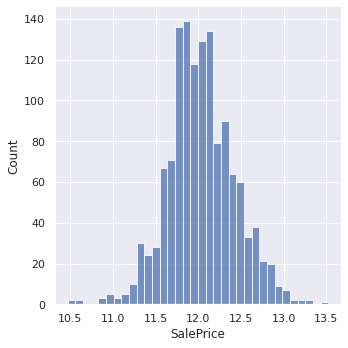

In [23]:
plt.figure()
sns.displot(df['SalePrice'],color='b')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1334 non-null   int64  
 1   MSZoning       1334 non-null   object 
 2   LotFrontage    1334 non-null   float64
 3   LotArea        1334 non-null   int64  
 4   Street         1334 non-null   object 
 5   LotShape       1334 non-null   object 
 6   LandContour    1334 non-null   object 
 7   Utilities      1334 non-null   object 
 8   LotConfig      1334 non-null   object 
 9   LandSlope      1334 non-null   object 
 10  Neighborhood   1334 non-null   object 
 11  Condition1     1334 non-null   object 
 12  Condition2     1334 non-null   object 
 13  BldgType       1334 non-null   object 
 14  HouseStyle     1334 non-null   object 
 15  OverallQual    1334 non-null   int64  
 16  OverallCond    1334 non-null   int64  
 17  YearBuilt      1334 non-null   int64  
 18  YearRemo

In [25]:
# Time to convert the Year column
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']
df.shape

(1334, 72)

In [26]:
## identifying numeric variables
numeric = df.select_dtypes(include=['float64','int64'])
numeric = numeric.columns

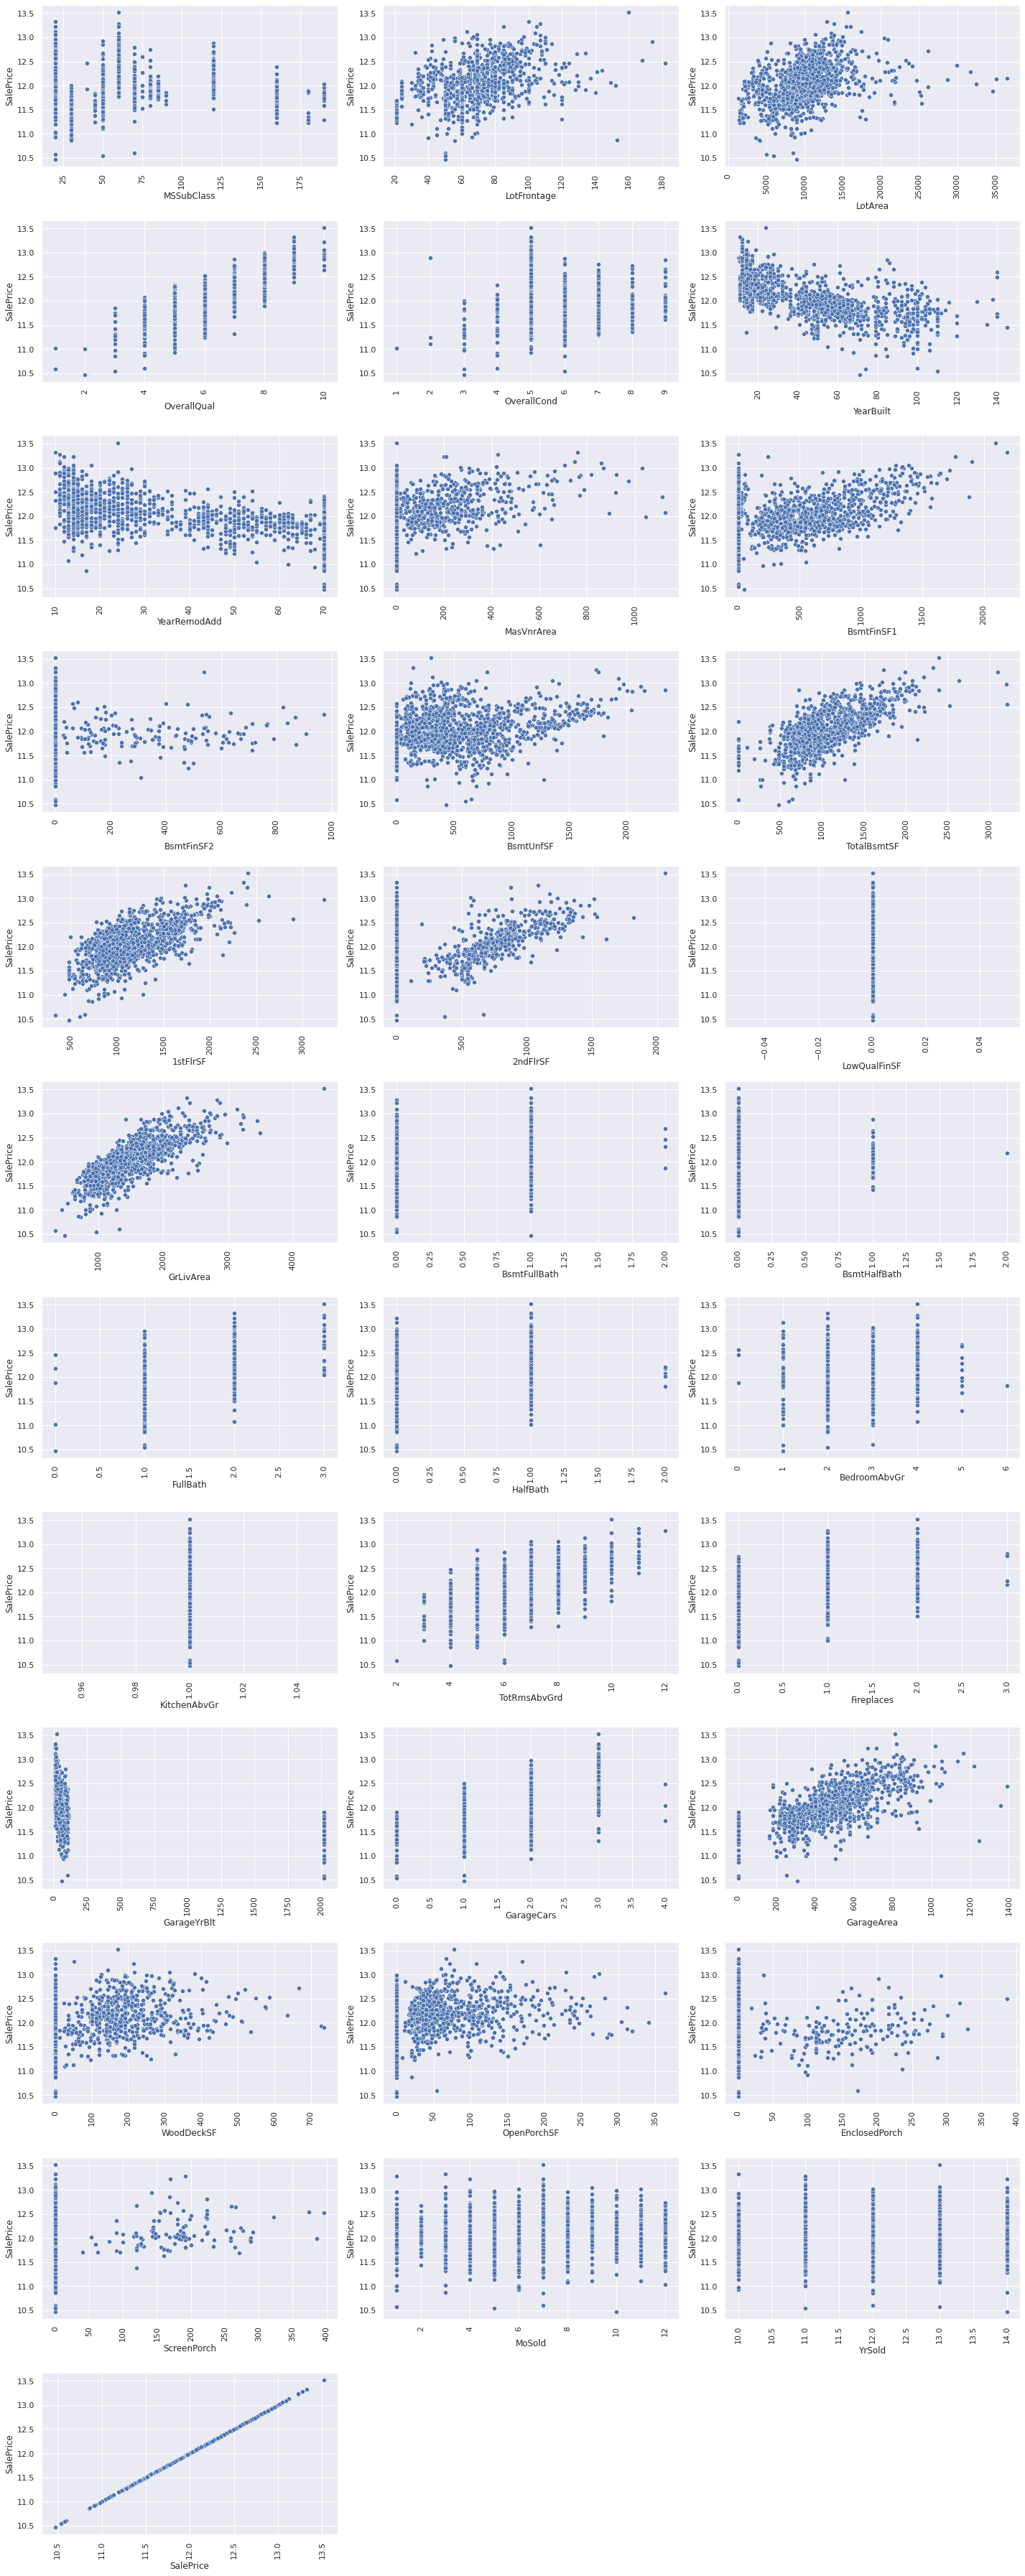

In [27]:
## Creating pairplots to identify the trends 
plt.figure(figsize = (20,50))
i = 1
for x in numeric :
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=df)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

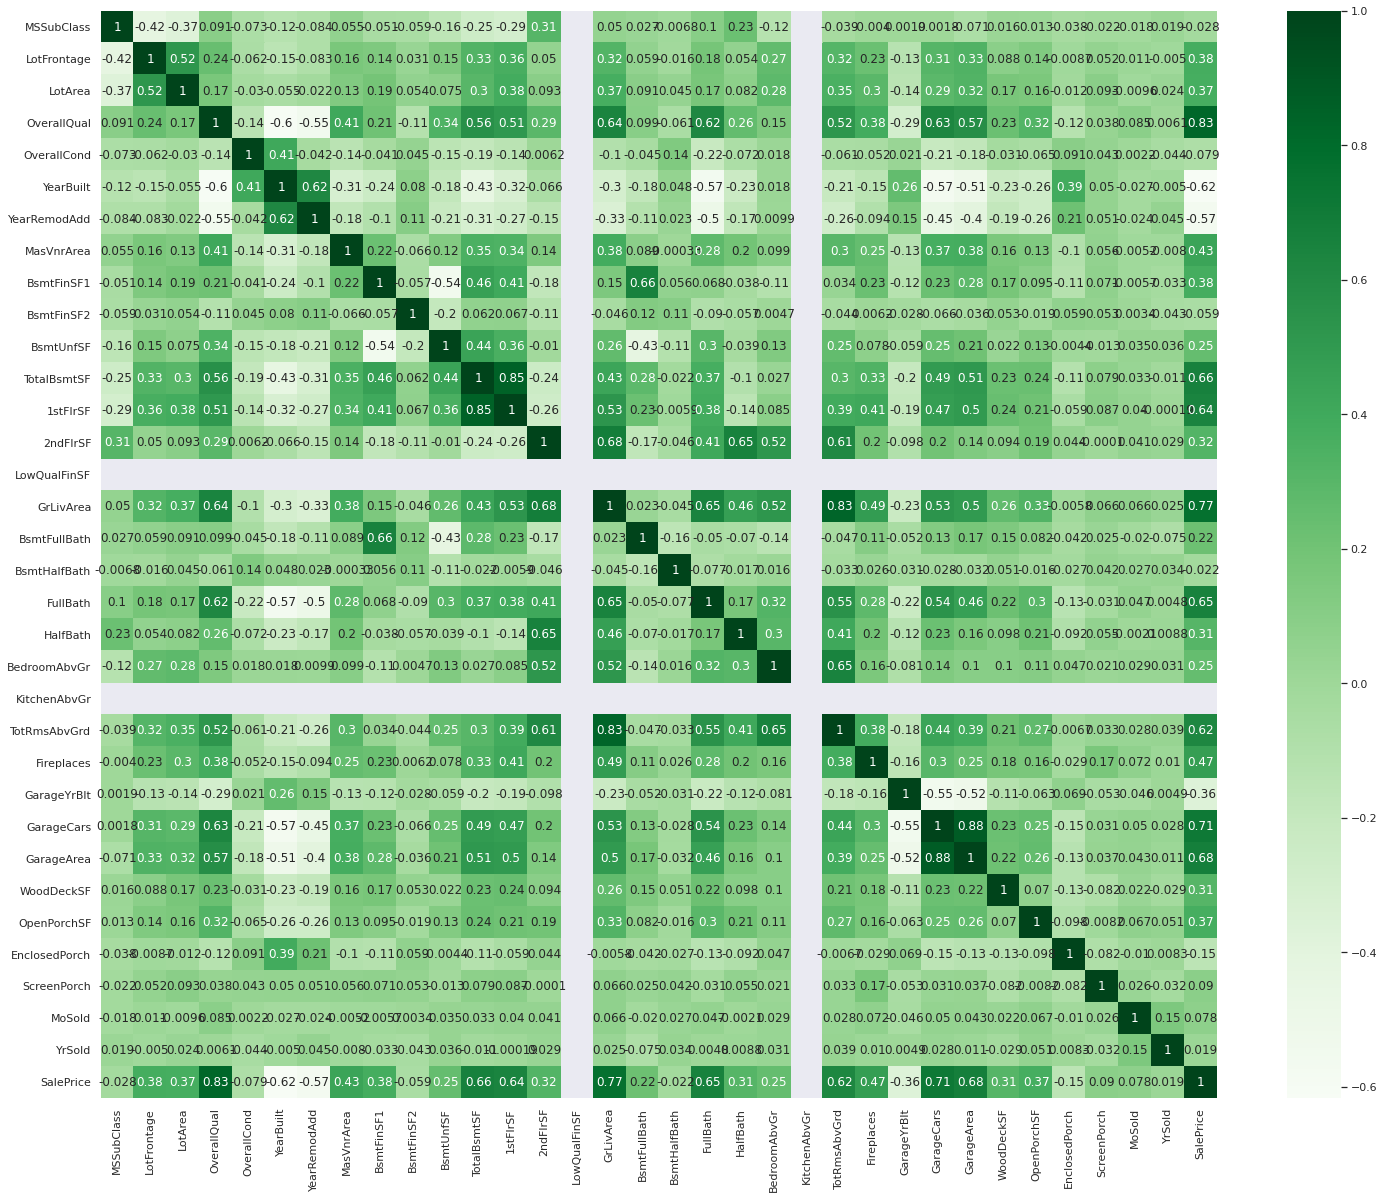

In [28]:
## finding out correlation between variable and correlation against target variable
plt.figure(figsize = (25, 20))
sns.heatmap(df[numeric].corr(),cmap="Greens", annot = True)
plt.show()

1. OverallQual,GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt - are the highly correlated column with Salesprice
2. GarageArea and GarageCars => 0.88 Correlation
3. 1stFlrSF and TotalBsmtSF  => 0.82 Correlation


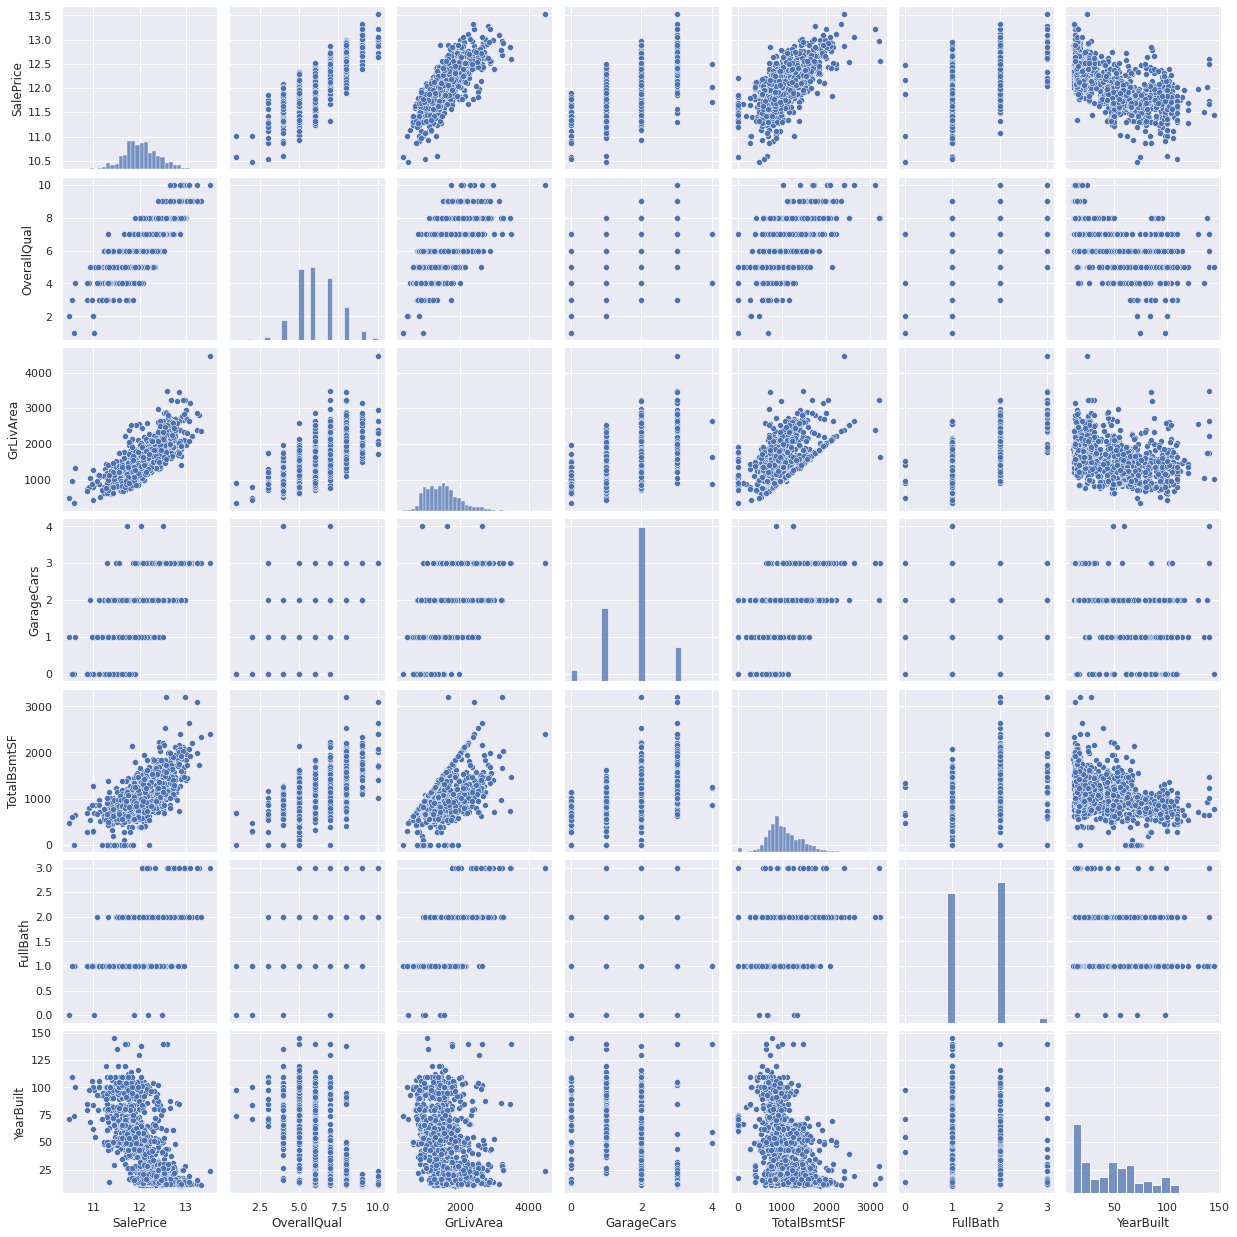

In [29]:
columns=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df[columns])
plt.show()

In [30]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


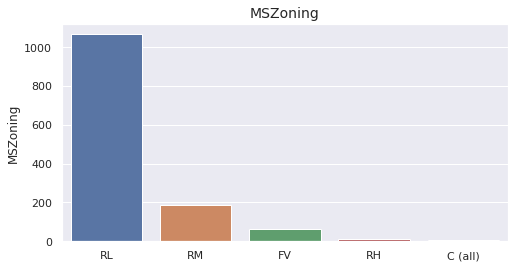

RL         1067
RM          188
FV           61
RH           11
C (all)       7
Name: MSZoning, dtype: int64


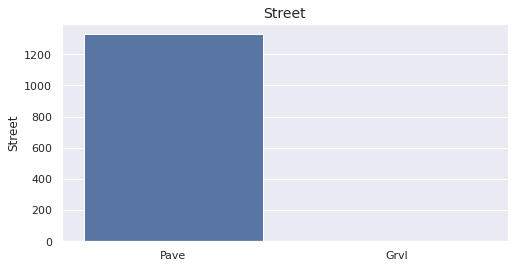

Pave    1329
Grvl       5
Name: Street, dtype: int64


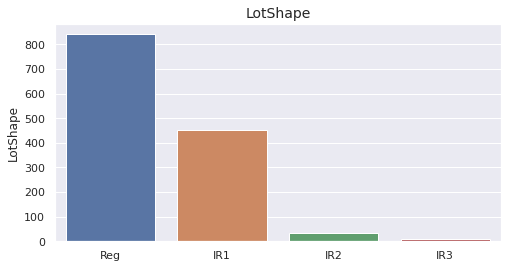

Reg    841
IR1    453
IR2     32
IR3      8
Name: LotShape, dtype: int64


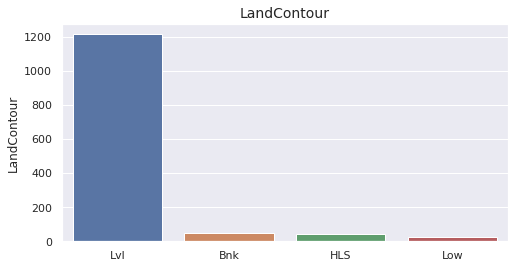

Lvl    1214
Bnk      49
HLS      45
Low      26
Name: LandContour, dtype: int64


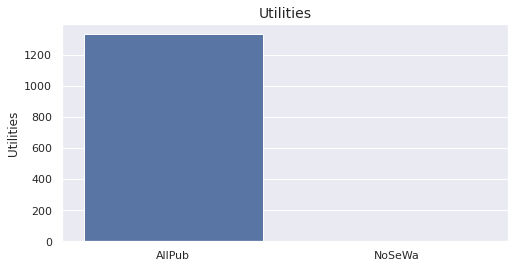

AllPub    1333
NoSeWa       1
Name: Utilities, dtype: int64


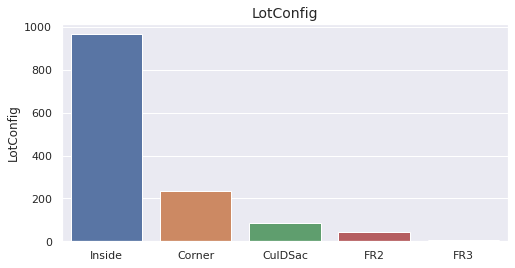

Inside     966
Corner     235
CulDSac     84
FR2         45
FR3          4
Name: LotConfig, dtype: int64


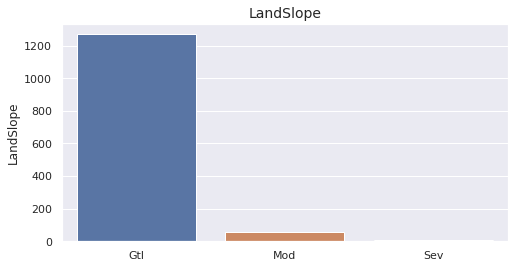

Gtl    1270
Mod      57
Sev       7
Name: LandSlope, dtype: int64


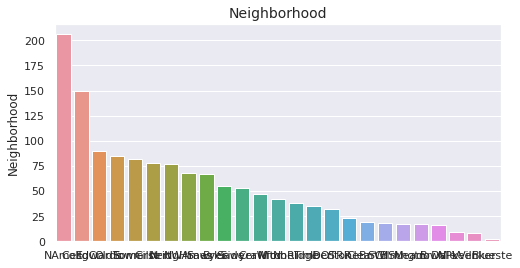

NAmes      206
CollgCr    150
Edwards     90
OldTown     85
Somerst     82
Gilbert     78
NridgHt     77
NWAmes      68
Sawyer      67
BrkSide     55
SawyerW     53
Crawfor     47
Mitchel     42
NoRidge     38
Timber      35
IDOTRR      32
StoneBr     23
ClearCr     19
SWISU       18
Blmngtn     17
MeadowV     17
BrDale      16
NPkVill      9
Veenker      8
Blueste      2
Name: Neighborhood, dtype: int64


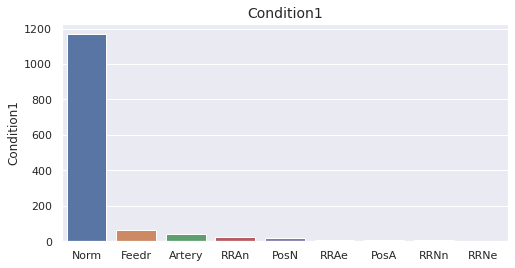

Norm      1168
Feedr       63
Artery      39
RRAn        23
PosN        18
RRAe         9
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


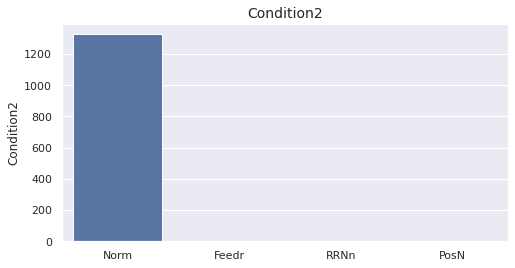

Norm     1327
Feedr       4
RRNn        2
PosN        1
Name: Condition2, dtype: int64


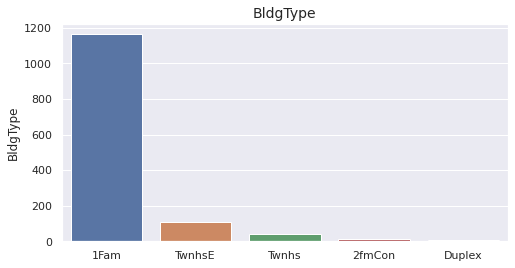

1Fam      1164
TwnhsE     110
Twnhs       42
2fmCon      12
Duplex       6
Name: BldgType, dtype: int64


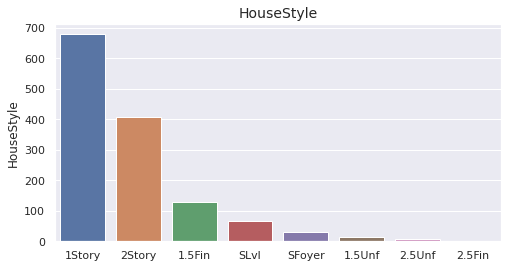

1Story    679
2Story    407
1.5Fin    130
SLvl       65
SFoyer     32
1.5Unf     13
2.5Unf      7
2.5Fin      1
Name: HouseStyle, dtype: int64


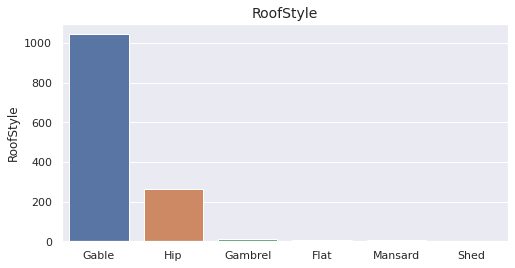

Gable      1045
Hip         264
Gambrel      10
Flat          8
Mansard       6
Shed          1
Name: RoofStyle, dtype: int64


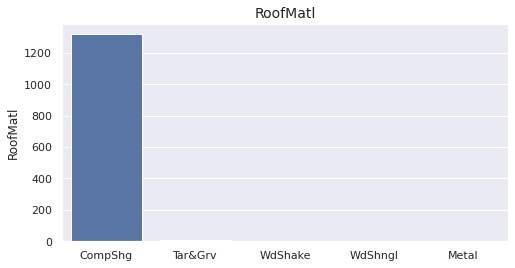

CompShg    1318
Tar&Grv       8
WdShake       5
WdShngl       2
Metal         1
Name: RoofMatl, dtype: int64


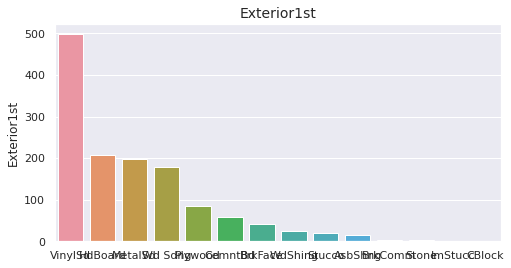

VinylSd    498
HdBoard    208
MetalSd    197
Wd Sdng    179
Plywood     85
CemntBd     59
BrkFace     42
WdShing     24
Stucco      21
AsbShng     15
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


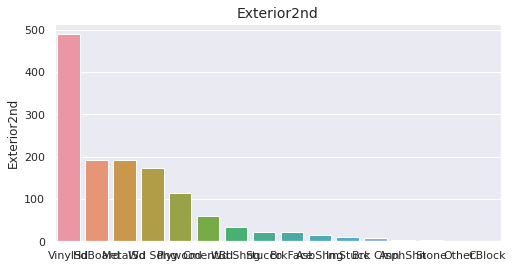

VinylSd    489
HdBoard    193
MetalSd    192
Wd Sdng    173
Plywood    113
CmentBd     59
Wd Shng     33
Stucco      22
BrkFace     21
AsbShng     16
ImStucc     10
Brk Cmn      7
AsphShn      2
Stone        2
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


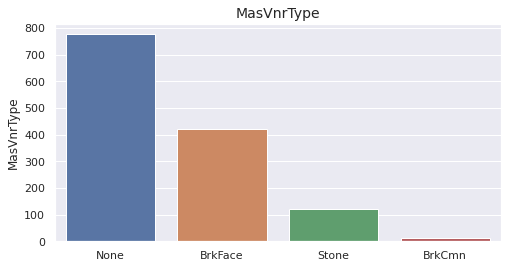

None       777
BrkFace    420
Stone      123
BrkCmn      14
Name: MasVnrType, dtype: int64


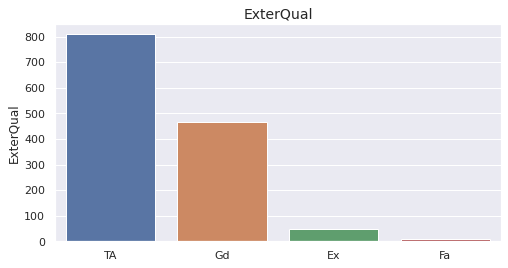

TA    809
Gd    468
Ex     47
Fa     10
Name: ExterQual, dtype: int64


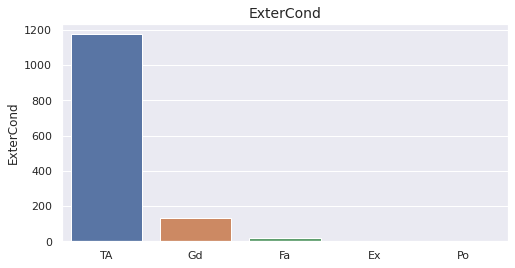

TA    1175
Gd     135
Fa      21
Ex       2
Po       1
Name: ExterCond, dtype: int64


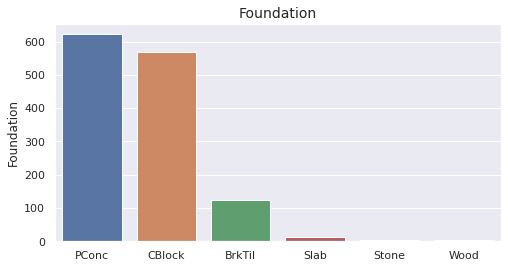

PConc     622
CBlock    569
BrkTil    124
Slab       12
Stone       4
Wood        3
Name: Foundation, dtype: int64


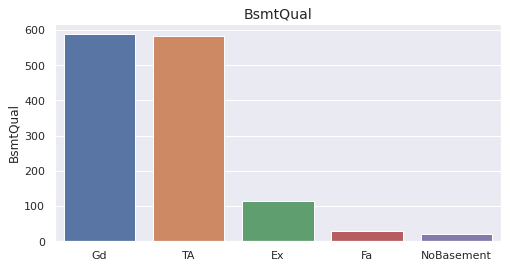

Gd            588
TA            582
Ex            114
Fa             30
NoBasement     20
Name: BsmtQual, dtype: int64


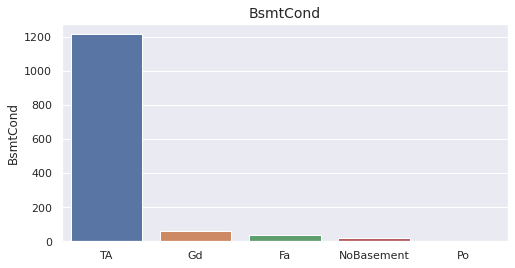

TA            1214
Gd              60
Fa              38
NoBasement      20
Po               2
Name: BsmtCond, dtype: int64


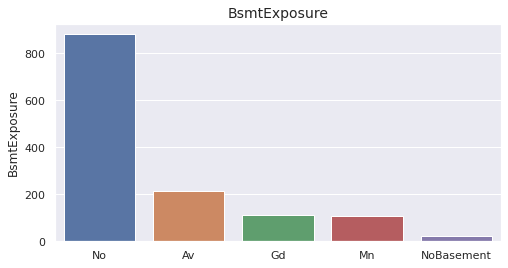

No            881
Av            212
Gd            112
Mn            108
NoBasement     21
Name: BsmtExposure, dtype: int64


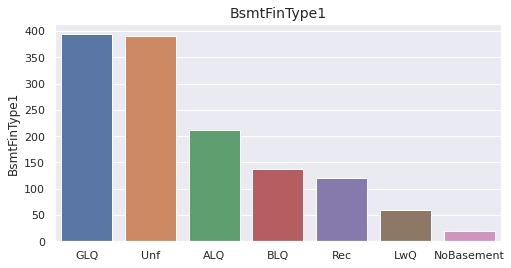

GLQ           394
Unf           390
ALQ           211
BLQ           138
Rec           121
LwQ            60
NoBasement     20
Name: BsmtFinType1, dtype: int64


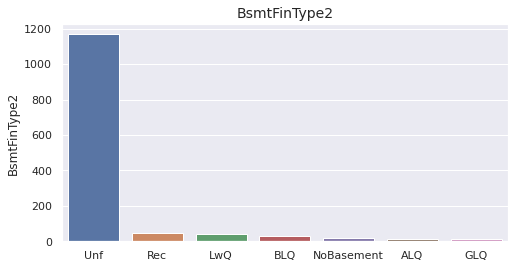

Unf           1169
Rec             46
LwQ             42
BLQ             30
NoBasement      21
ALQ             15
GLQ             11
Name: BsmtFinType2, dtype: int64


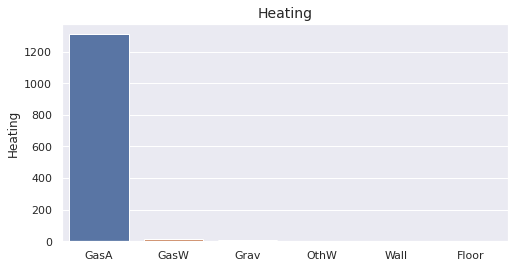

GasA     1310
GasW       14
Grav        7
OthW        1
Wall        1
Floor       1
Name: Heating, dtype: int64


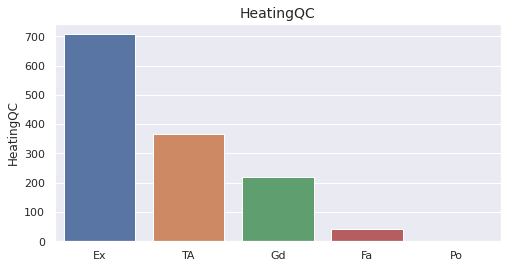

Ex    707
TA    367
Gd    218
Fa     41
Po      1
Name: HeatingQC, dtype: int64


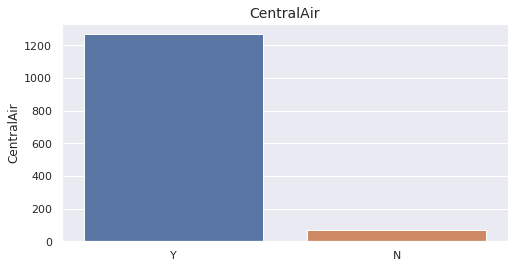

Y    1267
N      67
Name: CentralAir, dtype: int64


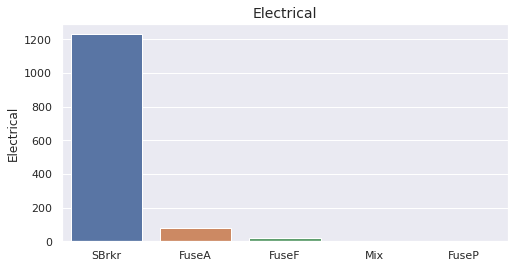

SBrkr    1231
FuseA      79
FuseF      21
Mix         1
FuseP       1
Name: Electrical, dtype: int64


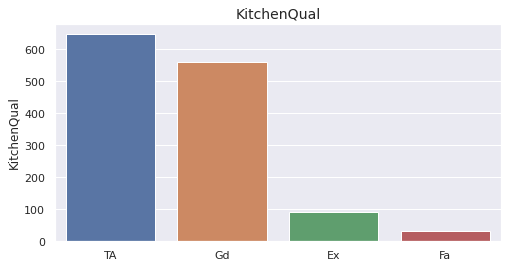

TA    647
Gd    561
Ex     93
Fa     33
Name: KitchenQual, dtype: int64


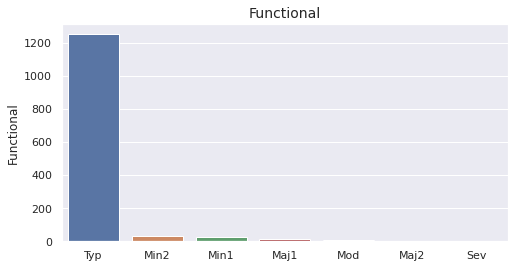

Typ     1252
Min2      30
Min1      27
Maj1      11
Mod        9
Maj2       4
Sev        1
Name: Functional, dtype: int64


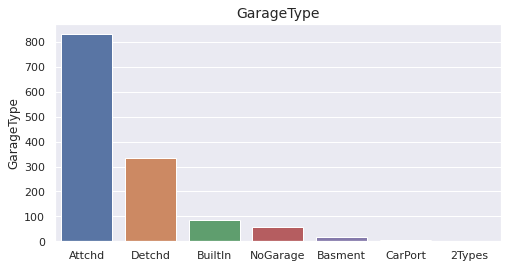

Attchd      831
Detchd      336
BuiltIn      84
NoGarage     57
Basment      18
CarPort       5
2Types        3
Name: GarageType, dtype: int64


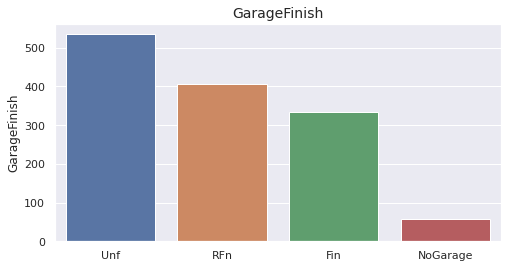

Unf         535
RFn         407
Fin         335
NoGarage     57
Name: GarageFinish, dtype: int64


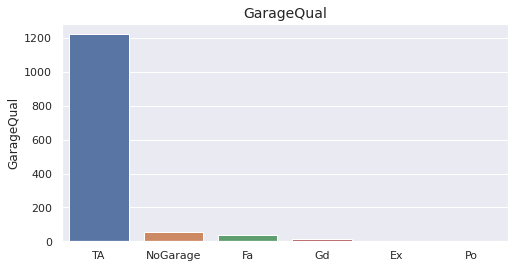

TA          1222
NoGarage      57
Fa            40
Gd            11
Ex             2
Po             2
Name: GarageQual, dtype: int64


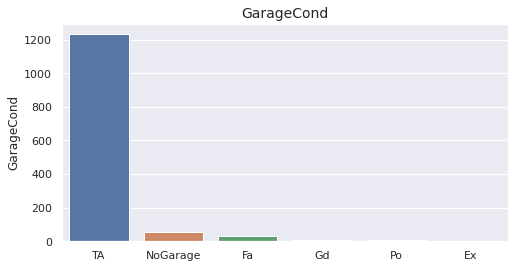

TA          1232
NoGarage      57
Fa            30
Gd             8
Po             5
Ex             2
Name: GarageCond, dtype: int64


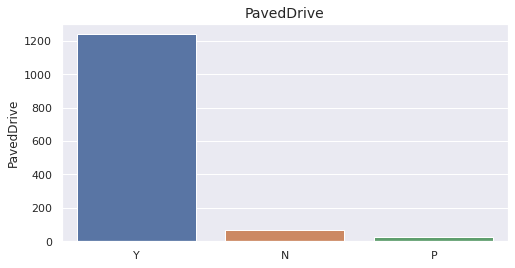

Y    1239
N      69
P      26
Name: PavedDrive, dtype: int64


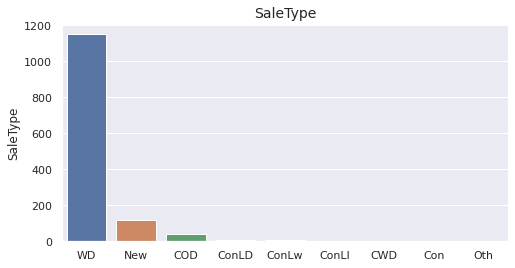

WD       1151
New       119
COD        40
ConLD       7
ConLw       5
ConLI       4
CWD         4
Con         2
Oth         2
Name: SaleType, dtype: int64


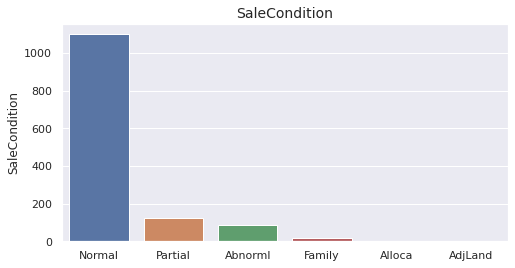

Normal     1100
Partial     122
Abnorml      89
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64


In [31]:
## Plot bar graph to see the levels of categorical columns
for col in df_cat.columns:
    plt.figure(figsize=(8,4))
    plt.title(col, fontdict={'fontsize': 14})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()
    print(df_cat[col].value_counts())

### Data Preparation

Spilting the Datain Train and Test Data

In [32]:
y=df.pop('SalePrice')
X=df

In [33]:
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [34]:
# creating dummy variables
housing_dum = pd.get_dummies(housing_cat, drop_first=True)
housing_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,

In [35]:
X = pd.concat([X, housing_dum], axis=1)
X.shape

(1334, 268)

In [36]:
categorical = df.select_dtypes(include=['object'])
categorical = categorical.columns
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
X = X.drop(categorical, axis = 1)
X.shape

(1334, 230)

#### Splitting the data into Training data and Testing Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,60,69.0,9375,7,5,23,22,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,22.0,2,645,576,36,0,0,2,11,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [39]:
y_train.head()

64      12.299108
735     12.001505
373     11.719940
466     12.025749
1026    12.028739
Name: SalePrice, dtype: float64

In [40]:
#Checking columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [43]:
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']
X_train[num_vars].head()

#Scaling using MinMax
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.

In [44]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.0,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.0,401.000000,401.000000,401.000000,401.000000,401.000000,401.

### Building Model 

#### Model 1 - RFE

In [46]:
#Importing Libraray
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with ouput number of variables=10
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,25)
rfe=rfe.fit(X_train,y_train)
#Finding the top ranked features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 103),
 ('LotFrontage', False, 87),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 97),
 ('MasVnrArea', False, 123),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 52),
 ('BsmtUnfSF', False, 76),
 ('TotalBsmtSF', False, 75),
 ('1stFlrSF', False, 71),
 ('2ndFlrSF', False, 72),
 ('LowQualFinSF', False, 77),
 ('GrLivArea', False, 70),
 ('BsmtFullBath', False, 117),
 ('BsmtHalfBath', False, 162),
 ('FullBath', False, 132),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', False, 186),
 ('KitchenAbvGr', False, 78),
 ('TotRmsAbvGrd', False, 175),
 ('Fireplaces', False, 151),
 ('GarageYrBlt', False, 196),
 ('GarageCars', False, 8),
 ('GarageArea', False, 204),
 ('WoodDeckSF', False, 206),
 ('OpenPorchSF', False, 199),
 ('EnclosedPorch', False, 205),
 ('ScreenPorch', False, 194),
 ('MoSold', False, 193),
 ('YrSold', False, 181),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL

In [48]:
#Print the coefficients and intercepts
lm1=lm.fit(X_train,y_train)
print(lm1.intercept_)

-2398555.9320940976


In [49]:
print(lm1.coef_)

[-9.74989933e-02  2.46143440e-02  2.19801714e-01  3.23466420e-01
  2.75642416e-01 -1.85169910e-01 -2.73829681e-02  2.87854837e-02
 -2.36106604e+08 -1.04888309e+08 -1.07909783e+05  1.07909783e+05
  1.99254367e+09  1.99254367e+09 -2.63719581e+07 -1.99254367e+09
  1.81458481e-02 -1.44848083e-02  1.44199766e-02  1.73562402e-02
  3.80642712e-04  2.39856564e+06  7.06584752e-03  1.29086794e-02
 -2.26434320e-04  3.39131523e-02  7.34180212e-05  5.42709604e-05
  1.90183520e-04  9.05618072e-05  2.22902745e-04  1.00624561e-03
  2.84125749e-03  6.55326366e-01  6.01058184e-01  6.08962320e-01
  5.86969025e-01 -1.14598657e-01 -2.00931448e-03  4.09321343e-02
  5.58971241e-03 -8.83296656e-03 -5.02307305e-02  5.59276948e-03
 -2.73549463e-01  3.74435848e-02 -1.15376427e-02 -8.18700673e-02
  1.46764889e-03  1.25024552e-02 -6.31303879e-02 -3.61546878e-02
 -1.08143264e-01  1.79700358e-02  4.32170916e-03 -5.51511161e-02
  1.26591756e-01 -1.14600258e-01 -5.53431353e-02 -3.50361886e-02
 -1.75158637e-01 -8.62659

In [50]:
#Importing libraries for model evaluation
from sklearn.metrics import r2_score,mean_squared_error
#Calculating r2score,RSS,RMSE
y_pred_train=rfe.predict(X_train)
y_pred_test=rfe.predict(X_test)

In [52]:
print("Scores for Linear-Regression")
print("====================================================================")
print('R2 score(train): ',r2_score(y_train,y_pred_train))
print('R2 score(test): ' ,r2_score(y_test,y_pred_test))
print("=======================================================================")
print('RSS: ',np.sum(np.square(y_train-y_pred_train)))
print('RSS(test): ' ,np.sum(np.square(y_test-y_pred_test)))
print("=======================================================================")
print('MSE(train): ',mean_squared_error(y_train,y_pred_train))
print('MSE(test): ' ,mean_squared_error(y_test, y_pred_test))

Scores for Linear-Regression
R2 score(train):  0.8260005802409522
R2 score(test):  0.8216655311693462
RSS:  23.740253016641216
RSS(test):  12.26600084916025
MSE(train):  0.025445072901008805
MSE(test):  0.030588530795910847


#### Model 2 - Ridge

In [53]:
#Importing Libraries
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [54]:
#Defining a list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.0773444901810402


In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013648,0.018627,0.002193,0.000178,0.0001,{'alpha': 0.0001},-0.087051,-0.087428,-0.081874,-0.077356,-0.096464,-0.086035,0.006393,24,-0.055310,-0.055040,-0.055038,-0.055717,-0.051253,-0.054472,0.001628
1,0.003620,0.000344,0.001788,0.000221,0.001,{'alpha': 0.001},-0.086635,-0.087381,-0.081791,-0.077359,-0.096308,-0.085895,0.006339,23,-0.055350,-0.055039,-0.055056,-0.055721,-0.051265,-0.054486,0.001629
2,0.003289,0.000029,0.001588,0.000032,0.01,{'alpha': 0.01},-0.083667,-0.086943,-0.081218,-0.077388,-0.094957,-0.084835,0.005947,22,-0.055703,-0.055051,-0.055222,-0.055756,-0.051397,-0.054626,0.001637
3,0.003291,0.000028,0.001614,0.000056,0.05,{'alpha': 0.05},-0.078456,-0.085492,-0.079565,-0.077303,-0.091865,-0.082536,0.005452,20,-0.056558,-0.055218,-0.055687,-0.055889,-0.051907,-0.055052,0.001630
4,0.003818,0.000532,0.001789,0.000186,0.1,{'alpha': 0.1},-0.076250,-0.084131,-0.078048,-0.077178,-0.090382,-0.081198,0.005358,19,-0.057172,-0.055420,-0.056059,-0.056113,-0.052329,-0.055418,0.001644


In [66]:
# Ridge regression:
ridge = Ridge(alpha=2)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.27115836e-02,  3.37961857e-02,  1.42120515e-01,  2.76953972e-01,
        2.38197799e-01, -1.04726188e-01, -4.28942271e-02,  1.48803817e-02,
        1.33149167e-02, -2.99720557e-02, -4.45520575e-05,  1.55107610e-04,
        7.75166360e-05,  8.45918841e-05,  0.00000000e+00,  1.62108510e-04,
        1.82974366e-02, -1.09666852e-02,  1.87715783e-02,  2.24666883e-02,
       -2.60338608e-03,  0.00000000e+00,  9.87394033e-03,  1.47032946e-02,
       -4.25762268e-05,  3.11033367e-02,  7.17344330e-05,  5.99697103e-05,
        1.76026481e-04,  7.53152219e-05,  1.75344698e-04,  1.07015020e-03,
        2.38919827e-03,  1.34033249e-01,  9.03826288e-02,  1.17862024e-01,
        9.89176839e-02,  8.84771660e-02,  1.51206674e-02,  2.80963362e-02,
        3.00354686e-03, -5.08308325e-03, -4.34040699e-02, -5.56651905e-03,
       -4.69364658e-02,  3.33737959e-02, -1.41586557e-02, -4.11277784e-02,
       -4.02825619e-03, -5.01826115e-04, -2.33147591e-02,  7.78009666e-03,
       -4.76779761e-02,  

In [67]:
# predict
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
ridge_model = []
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
ridge_model.append(r2_train)
r2_test =  r2_score(y_test, y_pred_test)
ridge_model.append(r2_test)

Ridge(alpha=2)  Regression
R2 score (train) :  0.9478194394307451
R2 score (test) :  0.9206580022220109


In [68]:
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
0,MSSubClass,10.527342
4,OverallCond,0.276954
5,YearBuilt,0.238198
3,OverallQual,0.142121
57,Neighborhood_Edwards,0.136991
34,MSZoning_RH,0.134033
36,MSZoning_RM,0.117862
73,Neighborhood_Timber,0.101023
37,Street_Pave,0.098918
196,GarageType_Attchd,0.094413


#### Model 3 - Lasso

In [69]:
lasso=Lasso()
folds = 5
#Doing cross-validation
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.0770315096563104


In [71]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-8.42751085e-03,  2.33516745e-02,  1.85129853e-01,  3.67155891e-01,
        2.68955188e-01, -1.69060350e-01, -3.36993290e-02,  8.61203272e-03,
        0.00000000e+00, -1.86072939e-02, -5.22410046e-05,  1.59531019e-04,
        1.94621312e-04,  2.03917173e-04,  0.00000000e+00,  3.56287252e-05,
        2.00545615e-02, -8.41197324e-03,  1.58631560e-02,  1.93649985e-02,
       -1.63765003e-03,  0.00000000e+00,  8.10275566e-03,  1.37455277e-02,
       -4.20908407e-05,  3.52147110e-02,  7.02999225e-05,  6.06476358e-05,
        1.75851882e-04,  8.87787044e-05,  1.67787116e-04,  6.62379327e-04,
        2.11208362e-03,  4.11689593e-01,  3.59101474e-01,  3.76125254e-01,
        3.44859317e-01,  1.00734418e-01,  2.76407771e-03,  2.29331548e-02,
        3.97421908e-03, -3.45083966e-03, -4.03674197e-02,  2.33931324e-03,
       -7.61711110e-02,  3.48826064e-02, -3.29630060e-03, -3.43548460e-02,
       -0.00000000e+00,  0.00000000e+00, -3.18173241e-03,  0.00000000e+00,
       -3.82296862e-02,  

In [72]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=0.0001)  Regression
R2 score (train) :  0.9506146231824287
R2 score (test) :  0.9227318406486026


In [73]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_test.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(10)

,Coeff Values,Variables,Absolute Coefficent
33,0.411690,MSZoning_FV,0.411690
35,0.376125,MSZoning_RL,0.376125
3,0.367156,OverallQual,0.367156
34,0.359101,MSZoning_RH,0.359101
36,0.344859,MSZoning_RM,0.344859
4,0.268955,OverallCond,0.268955
190,-0.235285,Functional_Maj2,0.235285
175,-0.188045,Heating_Grav,0.188045
2,0.185130,LotArea,0.185130
5,-0.169060,YearBuilt,0.169060


### Evaluating the Model

In [74]:
# predict
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge(alpha=2)  Regression
R2 score (train) :  0.9478194394307451
R2 score (test) :  0.9206580022220109


In [75]:

Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=0.0001)  Regression
R2 score (train) :  0.9506146231824287
R2 score (test) :  0.9227318406486026


In [77]:
print('Top 10 features:')
lasso_df.head(10)

Top 10 features:


,Coeff Values,Variables,Absolute Coefficent
33,0.411690,MSZoning_FV,0.411690
35,0.376125,MSZoning_RL,0.376125
3,0.367156,OverallQual,0.367156
34,0.359101,MSZoning_RH,0.359101
36,0.344859,MSZoning_RM,0.344859
4,0.268955,OverallCond,0.268955
190,-0.235285,Functional_Maj2,0.235285
175,-0.188045,Heating_Grav,0.188045
2,0.185130,LotArea,0.185130
5,-0.169060,YearBuilt,0.169060


### **Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ridge(alpha=2)  Regression
===================================
R2 score (train) :  0.9478194394307451

R2 score (test) :  0.9206580022220109


Lasso(alpha=0.0001)  Regression
===================================
R2 score (train) :  0.9506146231824287

R2 score (test) :  0.9227318406486026


In [79]:
#Doubling the Alpha for ridge
alpha=4
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=4)

In [80]:
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge(alpha=4)  Regression
R2 score (train) :  0.9441251416327239
R2 score (test) :  0.9222711776664714


In [81]:
#Doubling the Alpha for lasso
alpha=0.0002
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-3.13445324e-03,  2.29930144e-02,  1.71998058e-01,  3.75923035e-01,
        2.73336311e-01, -1.58241582e-01, -3.81942822e-02,  0.00000000e+00,
        0.00000000e+00, -8.03611502e-03, -5.61129375e-05,  1.68459116e-04,
        2.01195137e-04,  2.14694339e-04,  0.00000000e+00,  3.77806089e-05,
        1.99110035e-02, -5.49697544e-03,  1.37285705e-02,  1.82358214e-02,
       -1.59202096e-03,  0.00000000e+00,  8.19667226e-03,  1.56163947e-02,
       -3.60220745e-05,  3.57473165e-02,  6.84228482e-05,  6.25064387e-05,
        1.70694430e-04,  9.64001803e-05,  1.61632560e-04,  6.52638087e-04,
        2.31507397e-03,  2.49222389e-01,  1.92890343e-01,  2.19852921e-01,
        1.81965606e-01,  7.10381575e-02,  1.42364505e-03,  0.00000000e+00,
        3.12637900e-03, -0.00000000e+00, -2.75673151e-02,  1.73347452e-03,
       -0.00000000e+00,  3.31959025e-02, -0.00000000e+00, -0.00000000e+00,
       -7.99293904e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -4.53981561e-03,  

In [82]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=0.0002)  Regression
R2 score (train) :  0.9463102144996477
R2 score (test) :  0.9268622444377022


Observations after doubling the value of Alpha:
R2 score reduced for the training and test data when doubling the alpha

The top 10 predictor are:

1. OverallQual
2. OverallCond
3. Neighborhood_StoneBr
4. Neighborhood_NoRidge
5. ExterQual_Gd
6. ExterQual_TA
7. LotArea
8. KitchenQual_Gd
9. KitchenQual_TA
10. YearBuilt

### **Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans) Based on the R2scores we can choose Lasso, As the R2score is slightly high.



### **Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [87]:
X_train_new=X_train.drop(['OverallQual','OverallCond','Neighborhood_StoneBr','Neighborhood_NoRidge','ExterQual_Gd'],axis=1)
X_test_new = X_test.drop(['OverallQual','OverallCond','Neighborhood_StoneBr','Neighborhood_NoRidge','ExterQual_Gd'],axis=1)

In [86]:
# Building Lasso Model with the new dataset
lasso_new = Lasso(alpha=0.0001)
lasso_new.fit(X_train_new,y_train)
lasso_new_coef = lasso_new.coef_
y_test_pred_new = lasso_new.predict(X_test_new)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso_new_coeff = pd.DataFrame(np.atleast_2d(lasso_new_coef),columns=X_train_new.columns)
lasso_new_coeff = lasso_new_coeff.T
lasso_new_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso_new_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_new_coeff.head(5)

The R2 Score of the model on the test dataset is 0.9222711776664714
The MSE of the model on the test dataset is 0.013332310300241502
The most important predictor variables are as follows:


,Lasso Co-Efficient
MSZoning_FV,0.479621
MSZoning_RL,0.460882
MSZoning_RM,0.438458
MSZoning_RH,0.429138
LotArea,0.150728


### **Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Outlier Analysis is a must and we need to ensure that retain only those values which are relevant to dataset
The model should be simple as the more complex the model the more probability that it will overfit.
If the above is not performed correctly there is a possiblity that the accuracy will decrease on the test set due to overfitting or underfitting.


The above can analyzed using the Bias-Varience tradeoff:
Bias is a phenomenon that skews the result of an algorithm in favor or against an idea.
Variance refers to the changes in the model when using different portions of the training data set.

* ====================END=========================== *